# International Football Results- An Exploratory Data Analysis
![world-cup-image](https://www.dfb.de/fileadmin/_processed_/201401/csm_wmpokal_gi_2720_e3ee390a5b.jpg)


### Analyzing International football results from 1872 to 2021
**- An up-to-date dataset of over 40,000 international football results**

This report takes a look at some of the past results of international football matches using some Python Data Analysis tools such as Numpy, Pandas, Matplotlib and Seaborn. This analysis will also look into the future aspects of some of the performances of the countries with regards to the upcoming Fifa World Cup 2022 to be held in Qatar. We will take a look at factors like some of the best teams of a certain time, along with player and team performances with regards to the venue, etc.

**About the Dataset**

This dataset is collected from the dataset library of Kaggle.com, an interactive online Data Science project hosting site. The link to the raw dataset can be found here: https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017?select=shootouts.csv

### Methodology
The following steps have been undertaken to perform this EDA:
1. Data preparation and cleaning: finding and dealing with missing values, inconsistent data; outlier treatment, etc.
2. Non-graphical analysis: variables, data types, basic metrics.
3. Exploratory Analysis and Visualizations: using tools such as charts, graphs and images.
4. Asking and Answering questions.
5. Inferences and Conclusions.
6. Scope for future work.


## Downloading the Dataset

Now, there are three ways of downloading the dataset:

- importing **urllib.request** module in Python and then using the **urlretrieve** function from that module to download CSV files from a raw URL
- downloading the dataset directly from the website link and then uploading the files directly in the Jupyter directory
- using a helper library, e.g. **opendatasets** and using it's download function

**Downloading using opendatasets:**

In [243]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [244]:
dataset_url = 'https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017?select=shootouts.csv' 

In [245]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./international-football-results-from-1872-to-2017" (use force=True to force download)


The dataset has been downloaded and extracted.

In [246]:
data_dir = './international-football-results-from-1872-to-2017'

In [247]:
import os
os.listdir(data_dir)

['shootouts.csv', 'results.csv']

Let us save and upload our work to Jovian before continuing.

In [248]:
project_name = "international-football-results-eda"

In [249]:
!pip install jovian --upgrade -q

In [250]:
import jovian

In [251]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shaikhrezwan66/international-football-results-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/shaikhrezwan66/international-football-results-eda


'https://jovian.ai/shaikhrezwan66/international-football-results-eda'

## Data Preparation and Cleaning

Before we start our data analysis, we need to prepare and clean our data so that it is complete and can be manipulation easily for deductions. This process may include tasks like exploring the values and ranges; handling missing, invalid, incorrect data; and some other additional steps to render the data for further examination.


**Loading the data:**

We will first import the Numpy library for arrays and Pandas library for loading and manipulating dataframes.



In [252]:
import numpy as np
import pandas as pd

**Importing the raw dataset of the 'results' table:**

In [253]:
results_df_raw=pd.read_csv('./international-football-results-from-1872-to-2017/results.csv')
results_df_raw

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43177,2022-02-01,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43178,2022-02-02,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43179,2022-02-03,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43180,2022-02-05,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


**Importing the raw dataset of the 'shootouts' table:**

In [254]:
shootouts_df_raw=pd.read_csv('./international-football-results-from-1872-to-2017/shootouts.csv')
shootouts_df_raw

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia
...,...,...,...,...
450,2022-01-26,Ivory Coast,Egypt,Egypt
451,2022-01-26,Mali,Equatorial Guinea,Equatorial Guinea
452,2022-02-03,Cameroon,Egypt,Egypt
453,2022-02-05,Cameroon,Burkina Faso,Cameroon


The **.info()** method gives us an idea of the number of columns, any missing values, and the datatypes of the values. We can mainly see here that there are no missing values in any column, so we can deduct that the dataset is complete.

In [200]:
results_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43182 entries, 0 to 43181
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43182 non-null  object
 1   home_team   43182 non-null  object
 2   away_team   43182 non-null  object
 3   home_score  43182 non-null  int64 
 4   away_score  43182 non-null  int64 
 5   tournament  43182 non-null  object
 6   city        43182 non-null  object
 7   country     43182 non-null  object
 8   neutral     43182 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


The **.describe()** method gives us some insight into the statistical analysis of the numeric values in the table. We can see here that the maximum point a home team scored against the away team is 31 points, whereas the maximum an away team scored against a home team is 21 points.

In [201]:
results_df_raw.describe()

,home_score,away_score
count,43182.000000,43182.000000
mean,1.742416,1.182669
std,1.753068,1.399705
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


Doing the same for the shootouts dataset, we notice that there is always a winner if the match goes to penalty shootouts!

In [255]:
shootouts_df_raw.describe()

,date,home_team,away_team,winner
count,455,455,455,455
unique,413,131,139,131
top,2021-07-06,South Africa,Egypt,Egypt
freq,4,14,13,13


Another way to look if there is a missing value in a dataset is using the **.sum()** method on the **isnull()** function.

In [256]:
shootouts_df_raw.isnull().sum()

date         0
home_team    0
away_team    0
winner       0
dtype: int64

One additional information that we may want to add to our results dataframe is to declare the **winner** team as an additional column into the results dataframe. For this we will be using the **np.select()** function of the Numpy library, which essentially returns the values of our given choices with regards to the conditions to be met.

In [257]:
#define conditions
conditions = [results_df_raw['home_score'] > results_df_raw['away_score'], 
              results_df_raw['home_score'] < results_df_raw['away_score']]

#define choices
choices = [results_df_raw.home_team, results_df_raw.away_team]

#create new column
results_df_raw['winner']= np.select(conditions, choices, default='Tie')

In [258]:
results_df_raw

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
43177,2022-02-01,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,Suriname
43178,2022-02-02,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,Senegal
43179,2022-02-03,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,Tie
43180,2022-02-05,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,Tie


Finalizing and selecting our required dataframes:

In [259]:
results_df=results_df_raw.copy()
shootouts_df=shootouts_df_raw.copy()

In [260]:
results_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
43177,2022-02-01,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,Suriname
43178,2022-02-02,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,Senegal
43179,2022-02-03,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,Tie
43180,2022-02-05,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,Tie


In [261]:
shootouts_df

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia
...,...,...,...,...
450,2022-01-26,Ivory Coast,Egypt,Egypt
451,2022-01-26,Mali,Equatorial Guinea,Equatorial Guinea
452,2022-02-03,Cameroon,Egypt,Egypt
453,2022-02-05,Cameroon,Burkina Faso,Cameroon


In [262]:
num_results=results_df.shape[0]
num_shootouts=shootouts_df.shape[0]
print("There are {} different match results in our results dataframe, and {} different shootout results in our shootouts dataframe.".format(num_results,num_shootouts))

There are 43182 different match results in our results dataframe, and 455 different shootout results in our shootouts dataframe.


In [263]:
import jovian

In [264]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shaikhrezwan66/international-football-results-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/shaikhrezwan66/international-football-results-eda


'https://jovian.ai/shaikhrezwan66/international-football-results-eda'

## Exploratory Analysis and Visualization

Before we ask some questions about the implication of these match results, it may be helpful for us to compute some interesting statistics about the winning and losing teams, and explore different distributions and relationships using plots and charts to make some interesting insights about the EDA.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [265]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

To start off, lets take a look at the top 10 teams who have played the highest number of home matches.

In [266]:
top10home= results_df['home_team'].value_counts()[0:10] #stores a dictionary of the top 10 home teams with key as team name and values as the playing frequency

frequency=list(top10home.values) #lists the number of times played

top10home_teams= list(top10home.keys()) #lists to top 10 teams who played most at home

print("The top 10 teams who have played the most home matches are:\n",top10home_teams)
print("And the amount of matches they have played at home respectively are:\n",frequency)

The top 10 teams who have played the most home matches are:
 ['Brazil', 'Argentina', 'Mexico', 'Germany', 'England', 'Sweden', 'France', 'South Korea', 'Hungary', 'Italy']
And the amount of matches they have played at home respectively are:
 [585, 561, 529, 521, 516, 501, 496, 489, 469, 461]


Now we will try to visualize this information using a bar plot which shows the teams playing the highest home matches and how many times they played these matches within this timeframe.

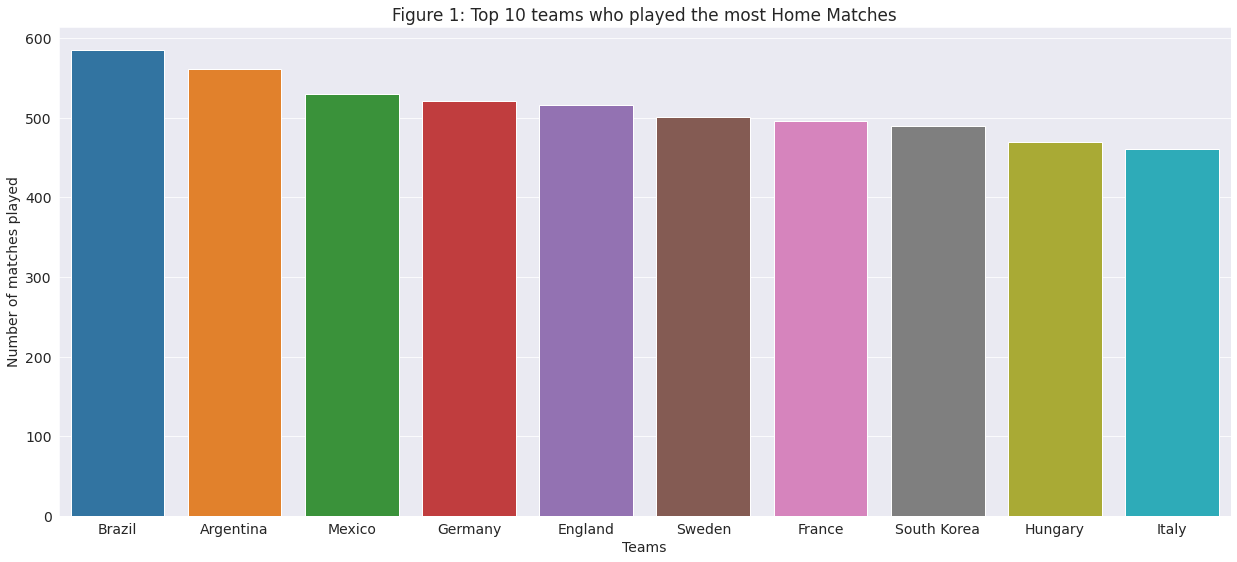

In [267]:
plt.figure(figsize=(21,9))
plt.title('Figure 1: Top 10 teams who played the most Home Matches')
plt.xlabel('Teams')
plt.ylabel('Number of matches played')
#plt.bar(top10home_teams,frequency);
fig_1=sns.barplot(x=top10home_teams,y=frequency);

Now, we can do the same calculations to look at the top 10 teams who have played the most number of away matches i.e. at venues other than their home venues.

In [268]:
top10away= results_df['away_team'].value_counts()[0:10] #stores a dictionary of the top 10 away teams with key as team name and values as the playing frequency

frequency_away=list(top10away.values) #lists the number of times played

top10away_teams= list(top10away.keys()) #lists to top 10 teams who played most away

print("The top 10 teams who have played the most away matches are:\n",top10away_teams)
print("And the amount of matches they have played away respectively are:\n",frequency_away)

The top 10 teams who have played the most away matches are:
 ['Uruguay', 'Sweden', 'England', 'Hungary', 'Paraguay', 'Germany', 'Poland', 'Argentina', 'Zambia', 'Finland']
And the amount of matches they have played away respectively are:
 [551, 542, 520, 486, 465, 453, 442, 442, 431, 428]


We will show this information in another bar plot.

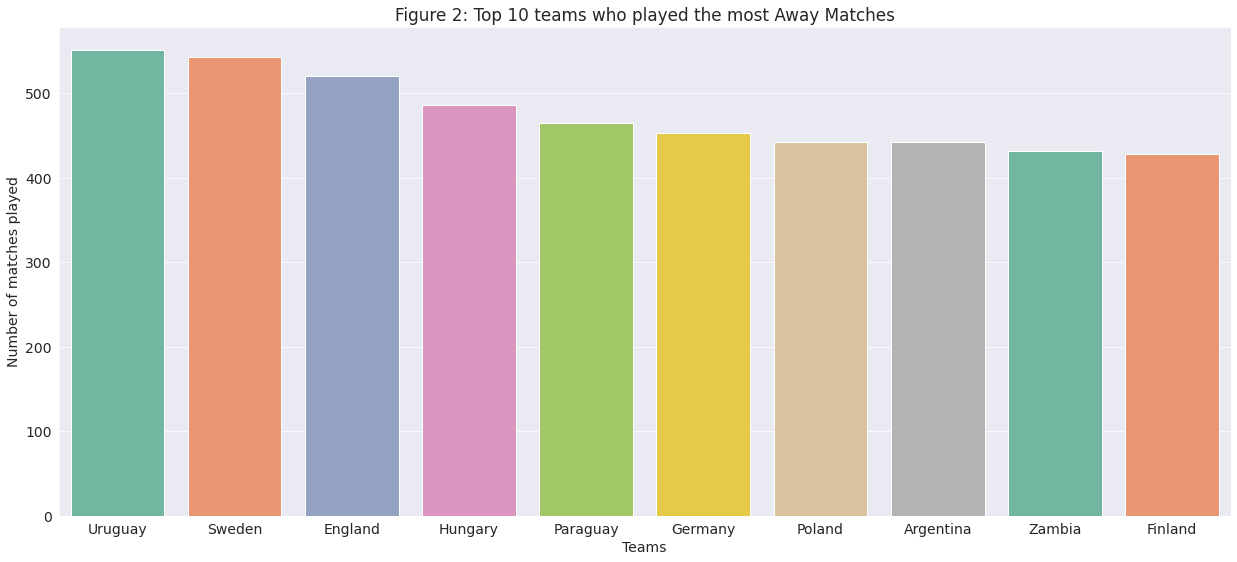

In [269]:
plt.figure(figsize=(21,9))
plt.title('Figure 2: Top 10 teams who played the most Away Matches')
plt.xlabel('Teams')
plt.ylabel('Number of matches played')
fig_2=sns.barplot(x=top10away_teams,y=frequency_away,palette='Set2');

From these two graphs, one thing we can infer is that England is one of the top countries in both lists along with Argentina, Germany, Sweden and Hungary. That means that these teams have good experience playing both in their home venues and in other venues.

Similarly, we may also want to take a look at the top 10 teams over the years who have won during the shootouts.

In [270]:
top10shootout_winners= shootouts_df['winner'].value_counts()[0:10] #stores a dictionary of the top 10 shootout winners with key as team name and values as the winning frequency

frequency_shootout_win=list(top10shootout_winners.values) #lists the number of times won at shootouts

top10shootout_winner_teams= list(top10shootout_winners.keys()) #lists to top 10 teams who won most shootouts

print("The top 10 teams who have won the most shootouts are:\n",top10shootout_winner_teams)
print("And the amount of matches they won by shootouts respectively are:\n",frequency_shootout_win)

The top 10 teams who have won the most shootouts are:
 ['Egypt', 'South Korea', 'Argentina', 'South Africa', 'Zambia', 'Kenya', 'Botswana', 'Nigeria', 'Brazil', 'Senegal']
And the amount of matches they won by shootouts respectively are:
 [13, 13, 11, 10, 10, 10, 8, 8, 8, 8]


Let us also visualize this information, but this time, in a different manner to look at the data in another way.

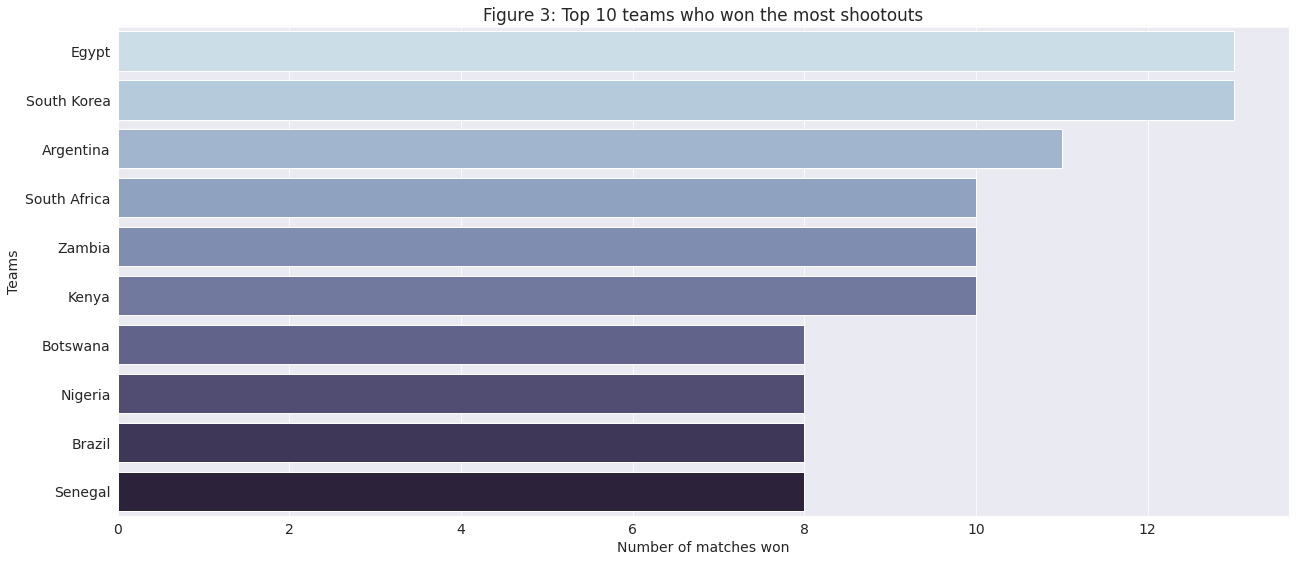

In [271]:
plt.figure(figsize=(21,9))
plt.title('Figure 3: Top 10 teams who won the most shootouts')
plt.xlabel('Number of matches won')
plt.ylabel('Teams')
fig_3=sns.barplot(x=frequency_shootout_win,y=top10shootout_winner_teams,palette='ch:s=.25,rot=-.25');

It is quite clear from the visualization that teams like Egypt, South Korea and Argentina have very good penalty experts in their team, so they are more likely to win if the match goes to a penalty shootout.

Let us save and upload our work to Jovian before continuing

In [272]:
import jovian

In [273]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shaikhrezwan66/international-football-results-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/shaikhrezwan66/international-football-results-eda


'https://jovian.ai/shaikhrezwan66/international-football-results-eda'

## Asking and Answering Questions

In this section we will ask some interesting questions about our data and gain insight into some of the different aspects of the world of football.



#### Q1: What is the average score by a home team compared to the average score of the away team in a particular match?

We are using the **.mean()** method from the Numpy library to mind the average values of the scores by the home team and the away team.

In [274]:
avg_home_score=round(results_df['home_score'].mean())
avg_away_score=round(results_df['away_score'].mean())
print("The average score of the home team is {}, whereas the average score of the away team is {}".format(avg_home_score,avg_away_score))

The average score of the home team is 2, whereas the average score of the away team is 1


Therefore, the dataset suggests that in any given match, the home team on average scores twice as much as the away team and so may have a 'Home Advantage'

#### Q2: Which team dominated the results in the last 10 years?
We will look at the winners for the last 10 years from the data frame. This process can of course be repeated to find the dominating teams from further before.
First we will convert our date series to the year, month, day, and weekday columns using the Pandas datetime library.

In [277]:
#Adding year, month, day, and weekday as seperate columns in the dataframe
results_df['date'] = pd.to_datetime(results_df.date)
results_df['year'] = pd.DatetimeIndex(results_df.date).year
results_df['month'] = pd.DatetimeIndex(results_df.date).month
results_df['day'] = pd.DatetimeIndex(results_df.date).day
results_df['weekday'] = pd.DatetimeIndex(results_df.date).weekday
results_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,month,day,weekday
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie,1872,11,30,5
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,1873,3,8,5
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874,3,7,5
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie,1875,3,6,5
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43177,2022-02-01,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,Suriname,2022,2,1,1
43178,2022-02-02,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,Senegal,2022,2,2,2
43179,2022-02-03,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,Tie,2022,2,3,3
43180,2022-02-05,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,Tie,2022,2,5,5


In [276]:
results_recent=(results_df[results_df.year>=2012]) #querying the results from the year 2012 onward

In [278]:
win_list=results_recent.winner.value_counts()[:10] #counts the top 10 winning list and amount of matches won by them
win_list.pop('Tie') #If we exclude the tie results
win_list

Brazil           92
Mexico           91
United States    88
France           86
Belgium          85
Spain            84
Germany          79
England          78
Qatar            78
Name: winner, dtype: int64

It is quite clear from the list that Brazil has been the most dominant team over the past 10 years with regards to the number of matches won. We can plot a bar chart with this series information:

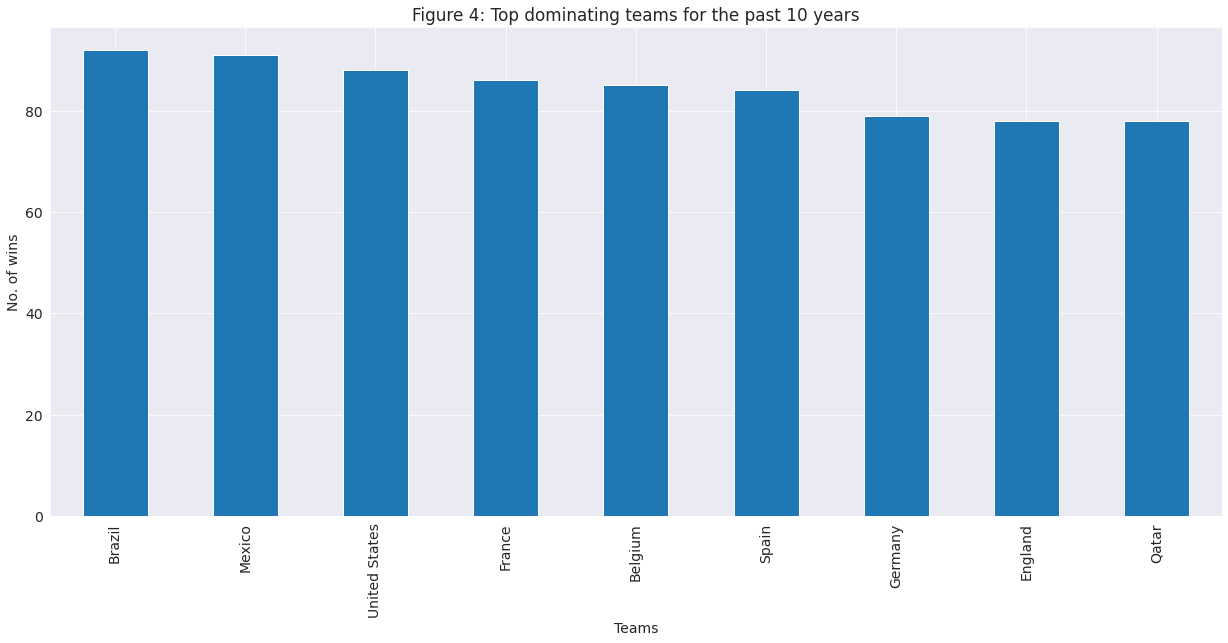

In [279]:
win_list.plot(kind='bar',figsize=(21,9),title='Figure 4: Top dominating teams for the past 10 years',xlabel='Teams',ylabel='No. of wins');

#### Q3: What is the percentage of winning for a home team compared to the away team and ties?

Now we will find out how many times the home team and away teams are declared the winner out of the 43,182 match results:

In [280]:
home_win_count= results_df[results_df.home_team==results_df.winner].count()['home_team']
print("The home team won {} times.".format(home_win_count))

The home team won 21004 times.


In [281]:
away_win_count= results_df[results_df.away_team==results_df.winner].count()['away_team']
print("The away team won {} times.".format(away_win_count))

The away team won 12223 times.


In [282]:
tie_count= results_df[results_df.winner=='Tie'].count()['winner']
total_matches=tie_count+away_win_count+home_win_count
print('There was a tie {} times out of the {} matches.'.format(tie_count,total_matches))

There was a tie 9955 times out of the 43182 matches.


Now we can easily find out the percentages of the events:

In [283]:
home_win_percent=(home_win_count/total_matches)*100
away_win_percent=(away_win_count/total_matches)*100
tie_percent=(tie_count/total_matches)*100

Now, let us plot a pie chart to visualize this percentage information more clearly.

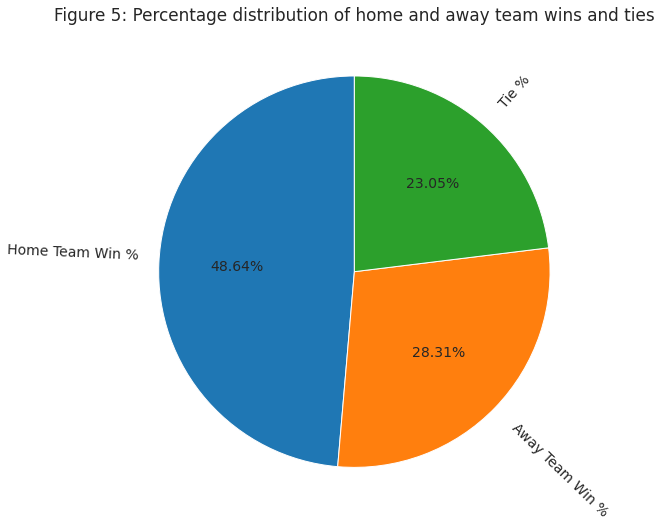

In [284]:
labels=['Home Team Win %','Away Team Win %','Tie %']
percents=[home_win_percent,away_win_percent,tie_percent]
plt.figure(figsize=(21,9))
plt.title('Figure 5: Percentage distribution of home and away team wins and ties')
plt.pie(percents, labels=labels, autopct='%.2f%%', startangle=90, rotatelabels=True);

It is quite evident from the pie chart that the home team won the highest percentage of matches, empowering the hypothesis further that the home team might have a home advantage.

#### Q4: What is the trend of winning or losing for the most dominant team of the last 10 years?

Now let us look back at some statistics of one of the most dominant football teams of the past 10 years, Brazil.

We will look at the number of Brazils' wins against a team:

In [285]:
brazil_wins=results_recent.winner.value_counts()['Brazil']
print("In the last 10 years from 2012 till now, Brazil won {} matches".format(brazil_wins))

In the last 10 years from 2012 till now, Brazil won 92 matches


Then we find the total matches played by Brazil in this timeframe:

In [286]:
brazil_home=results_recent.home_team.value_counts()['Brazil']
brazil_away=results_recent.away_team.value_counts()['Brazil']
brazil_matches=brazil_home+brazil_away
print("In the last 10 years from 2012 till now, Brazil played {} matches".format(brazil_matches))

In the last 10 years from 2012 till now, Brazil played 131 matches


Hence, we can find the winning percentage of Brazil for this time period:

In [287]:
brazil_win_percent=(brazil_wins/brazil_matches)*100
print("In the last 10 years from 2012 till now, Brazil's win percentage is {:.2f}%".format(brazil_win_percent))

In the last 10 years from 2012 till now, Brazil's win percentage is 70.23%


#### Q5: How did the total goals (between home team and away team) vary throughout the year of a World Cup?

Let us simply take a look at the year 2018, the year of the latest Fifa World Cup.

In [288]:
total_goals=abs(results_df.home_score+results_df.away_score) #finding the total goals regardless of home or away goals
results_df['total_goals']=total_goals #adding the total goals column to the dataframe

results_2018_goals=results_df[results_df.year==2018] #data frame of the total goals of 2018
results_2018_monthly_goals=results_2018_goals.groupby('month')['total_goals'].sum() #grouping the aggregate goals by per month

Let us visualize this very interesting revelation using a 'cool' Heatmap!

To do that, we first need to plot this information as a matrix:

In [289]:
results_2018_monthly_goals_df=results_2018_monthly_goals.to_frame() #converting the series to a dataframe
results_2018_monthly_goals_df['months_2018']=results_2018_monthly_goals_df.index #adding the months column as index to the dataframe

goals_2018_df=results_2018_monthly_goals_df.pivot_table(values='total_goals',index=None,columns='month') #converting the df to a pivot table
goals_2018_df

month,1,2,3,4,5,6,7,8,9,10,11,12
total_goals,78,15,351,29,126,480,38,31,375,381,397,68


Now we can plot the data using the **sns.heatmap()** plotting tool:

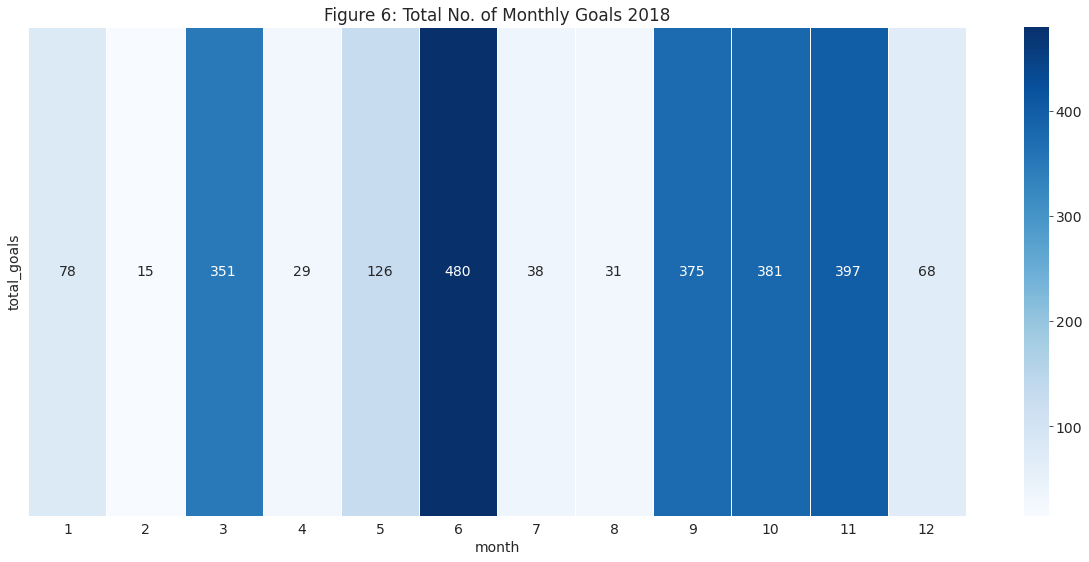

In [297]:
plt.figure(figsize=(21,9))
plt.title("Figure 6: Total No. of Monthly Goals 2018")
sns.heatmap(goals_2018_df, fmt="d", annot=True, cmap='Blues', linewidths=1);

From the above visualization, we can see that the highest amount of goals were counted during the month 6 .i.e. June, when the Fifa World Cup 2018 started in Russia.

Let us save and upload our work to Jovian before continuing.

In [298]:
import jovian

In [299]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shaikhrezwan66/international-football-results-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/shaikhrezwan66/international-football-results-eda


'https://jovian.ai/shaikhrezwan66/international-football-results-eda'

## Inferences and Conclusion

Now we can recapitulate some of the important insights we got from this dataset:

1. We found out that the dataset is complete and did not have any null values.
2. We appended the 'winner' column into the results dataframe, to find which team out of the home team and away team won.
3. We found the amount of different match and shootout results available to us in this database.
4. We surmised the top 10 teams who have played the highest amount of home matches(Brazil) and away matches(Uruguay), and also the amount of matches they played at home or abroad respectively.
5. Furthermore, we found out that out of all the countries, Egypt and South Korea have won the most matches, if the match went into a penalty shootout.
6. We also found from our results that the home team scored twice as much goals as the away team on average in a match.
7. We saw that Brazil dominated the winner board on average for the past 10 years from 2012 till now.
8. Then we saw that the match resulted in the home team winning almost as much as the match resulting in the away team winning or a tie combined.
9. Moreover, we deduced that Brazil won more than two-thirds of the matches it has played for the past 10 years from 2012 till now.
10. And lastly, we also found out that there are more goals on average in the month where a Fifa World Cup is held, compared to the other months when the other tournaments are hosted.

In [300]:
import jovian

In [301]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shaikhrezwan66/international-football-results-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/shaikhrezwan66/international-football-results-eda


'https://jovian.ai/shaikhrezwan66/international-football-results-eda'

## References and Future Work

**References:**
* Numpy documentation: https://numpy.org/doc/
* Pandas documentation: https://pandas.pydata.org/docs/
* Matplotlib documentation: https://matplotlib.org/
* Seaborn documentation: https://seaborn.pydata.org/
* Data Visualization cheat sheet: https://jovian.ml/aakashns/dataviz-cheatsheet
* Bar Charts: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
* Pie Charts: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
* Heatmaps: https://seaborn.pydata.org/generated/seaborn.heatmap.html
* Dataset Collection: https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

**Future Work:**
There is so much more to explore in this fascinating dataset. It might be interesting to look at some more aspects of this data like:
- Which is the best football team of all time.
- Which teams play better at home and which teams play better abroad.
- Which teams play more friendly tournaments and which play more international championships, etc.

In [302]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>